# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.21 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


In [6]:
env_info.rewards

[0.0]

In [7]:
env_info.local_done

[True]

In [8]:
env_info.vector_observations

array([[  0.00000000e+00,  -4.00000000e+00,   0.00000000e+00,
          1.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -4.37113883e-08,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -1.00000000e+01,
          0.00000000e+00,   1.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -4.37113883e-08,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   7.90150642e+00,
         -1.00000000e+00,   1.25147498e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,  -2.99753308e-01]])

When finished, you can close the environment.

In [9]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [10]:
from ddpg_agent import Agent

In [11]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

In [13]:
!ls

checkpoint_actor.pth	  ddpg_agent.py  __pycache__
checkpoint_critic.pth	  model2.py	 python
Continuous_Control.ipynb  model.py	 unity-environment.log


In [14]:
!cat ddpg_agent.py

import copy
from collections import namedtuple, deque
import numpy as np
import random


import torch
import torch.nn.functional as F
import torch.optim as optim

from model import Actor, Critic

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_si

In [15]:
!cat model.py

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=164, fc2_units=128):
        """Initialize parameters and build model.
        Params
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.bn = nn.BatchNorm1d(fc1_units)
        se


Episode 1 	Score: 0.21 	Average Score: 0.21
Episode 2 	Score: 0.10 	Average Score: 0.15
Episode 3 	Score: 0.30 	Average Score: 0.20
Episode 4 	Score: 0.71 	Average Score: 0.33
Episode 5 	Score: 1.46 	Average Score: 0.56
Episode 6 	Score: 0.57 	Average Score: 0.56
Episode 7 	Score: 0.51 	Average Score: 0.55
Episode 8 	Score: 0.65 	Average Score: 0.56
Episode 9 	Score: 1.67 	Average Score: 0.69
Episode 10 	Score: 1.31 	Average Score: 0.75
Episode 11 	Score: 0.20 	Average Score: 0.70
Episode 12 	Score: 0.87 	Average Score: 0.71
Episode 13 	Score: 0.76 	Average Score: 0.72
Episode 14 	Score: 1.18 	Average Score: 0.75
Episode 15 	Score: 2.09 	Average Score: 0.84
Episode 16 	Score: 0.80 	Average Score: 0.84
Episode 17 	Score: 1.33 	Average Score: 0.87
Episode 18 	Score: 0.71 	Average Score: 0.86
Episode 19 	Score: 0.72 	Average Score: 0.85
Episode 20 	Score: 0.66 	Average Score: 0.84
Episode 20	Score: 0.66 	Average Score: 0.84

Episode 21 	Score: 0.48 	Average Score: 0.82
Episode 22 	Score:

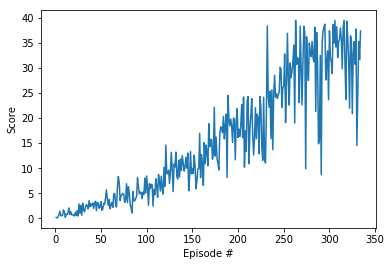

In [16]:
def ddpg(n_episodes=1000, max_t=1000, print_every=20):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        #print(f"Episode {i_episode}")
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        # scores = np.zeros(num_agents)    
        score = 0.0
        # print("Started time sample ")
        for t in range(max_t):
            # if t % 100 ==0:
            #     print(f"time = {t}")
            action = agent.act(state)
            env_info = env.step(action)[brain_name]  
            # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            reward = env_info.rewards                         # get reward (for each agent)
            done = env_info.local_done
            
            agent.step(state, action, reward, next_states, done)                        # update the score (for each agent)
            state = next_states

            score += reward[0]
            
            if np.any(done):
                break

        scores_deque.append(score)
        scores.append(score)
        print('\nEpisode {} \tScore: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\nEpisode {}\tScore: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
        if np.mean(scores_deque) > 30.0:
            print('\nEpisode {}\tScore: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
            print('\n Score is over 30.0 so objective is fullfilled. Stopping training.')
            break
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()